In [1]:
import pandas as pd
import datetime

def get_historical_data(file_path):
    ''' Load historical stock data from a CSV file. '''
    
    col_names = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    df = pd.read_csv(file_path, header=0, names=col_names)

    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    stock = pd.DataFrame(df)
    return df


In [3]:
data = get_historical_data("EW-MAX.csv")

In [5]:
import numpy as np
print(data.head())
print("\n")
print("Open    mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("---------------------------------------------------------------------------------------------------------------------------------------------")
print("High    mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("---------------------------------------------------------------------------------------------------------------------------------------------")
print("Low     mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("---------------------------------------------------------------------------------------------------------------------------------------------")
print("Close   mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("---------------------------------------------------------------------------------------------------------------------------------------------")
print("Volume  mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


                                   Date      Open      High       Low  \
2000/3/27 1970-01-01 00:00:00.000000003  4.156250  3.812500  4.125000   
2000/3/28 1970-01-01 00:00:00.000000004  4.125000  4.000000  4.015625   
2000/3/29 1970-01-01 00:00:00.000000004  4.031250  3.953125  4.000000   
2000/3/30 1970-01-01 00:00:00.000000004  4.000000  3.843750  3.843750   
2000/3/31 1970-01-01 00:00:00.000000003  3.734375  3.390625  3.390625   

              Close   Volume  
2000/3/27  4.125000  3675600  
2000/3/28  4.015625  1077600  
2000/3/29  4.000000   437200  
2000/3/30  3.843750  1883600  
2000/3/31  3.390625  7931600  


Open    mean : 30.893617887067393   	 Std:  30.20753491915109   	 Max:  121.75   	 Min:  3.390625
---------------------------------------------------------------------------------------------------------------------------------------------
High    mean : 30.23883320810565   	 Std:  29.612389093371565   	 Max:  120.169998   	 Min:  3.0
------------------------------------

In [7]:
data.reset_index(drop=True, inplace=True)

In [19]:
#moving average of 100 days
ma_100_days = data.Close.rolling(100).mean()

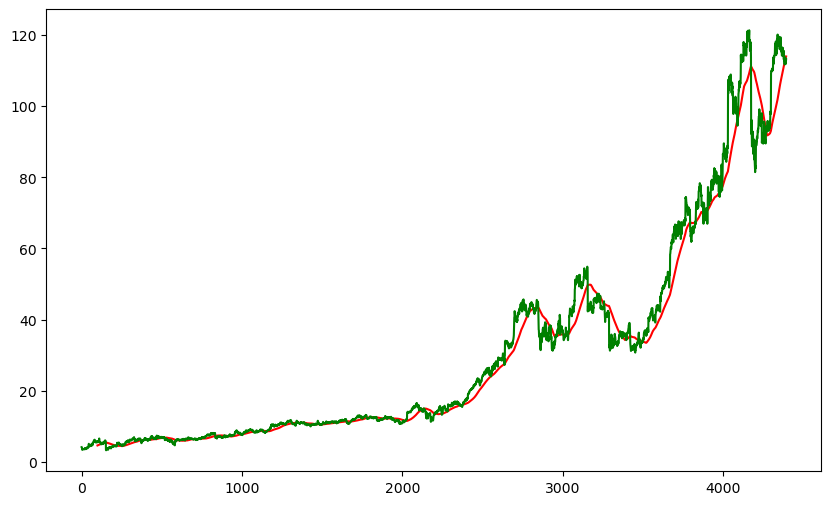

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [23]:
#moving average of ladt 200 days
ma_200_days = data.Close.rolling(200).mean()

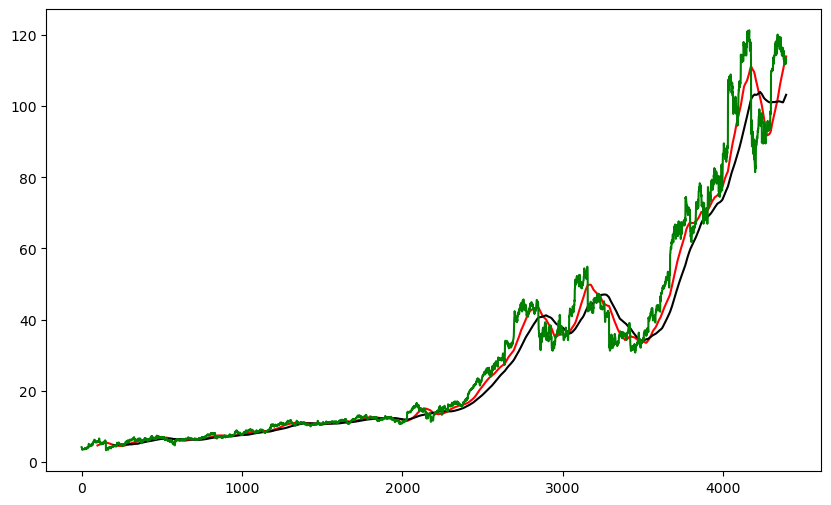

In [27]:
plt.figure(figsize=(10,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'k')
plt.plot(data.Close, 'g')
plt.show()

In [29]:
data.dropna(inplace= True)

In [31]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [35]:
data_train.shape[0]

3513

In [37]:
data_test.shape[0]

879

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [41]:
data_train_scale = scaler.fit_transform(data_train)

In [43]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [45]:
x, y = np.array(x), np.array(y)

In [47]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [49]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [53]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - loss: 0.0405
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 0.0049
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - loss: 0.0040
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - loss: 0.0041
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - loss: 0.0034
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 0.0040
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - loss: 0.0030
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 0.0035
Epoch 9/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - loss: 0.0033
Epoch 10/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - loss: 0.0030
Epoch 11/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - loss: 0.0029
Epoch 12/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 0.0030
Epoch 13/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 0.0029
Epoch 14/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 0.0024
Epoch 15/50
107/107 ━━━━━━━━━

In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [57]:
pas_100_days = data_train.tail(100)

In [59]:
pas_100_days = data_train.tail(100)

In [61]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [63]:
data_test_scale  =  scaler.fit_transform(data_test)

In [65]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [67]:
y_predict = model.predict(x)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [69]:
scale =1/scaler.scale_

In [71]:
y_predict = y_predict*scale

In [73]:
y = y*scale

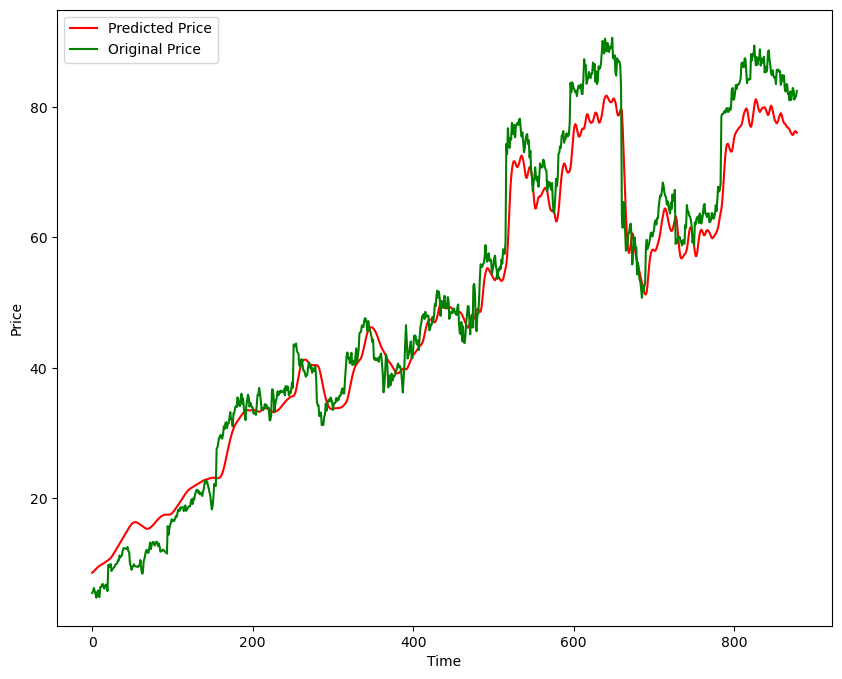

In [75]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [77]:
model.save('Stock Predictions Model.keras')